# Guided Project: Storytelling Data Visualization on Exchange Rates

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank. Note that the dataset gets regular updates — we downloaded it on January 2021.

## Slide 1: Introducing the Dataset

In [2]:
import pandas as pd

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [5]:
exchange_rates.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

(5699, 41)

The Data Frame has 41 coloumns and 5699 rows.
There are many null values.
Column data types are mostly strings with some floats.

## Slide 2: Data Cleaning

In [8]:
# Focusing on USD VS EURO rates

exchange_rates.rename(columns={'[US dollar ]':'US_dollar','Period\\Unit:':'Time'}, inplace=True) #rename columns
exchange_rates['Time']= pd.to_datetime(exchange_rates['Time']) # Changing the Time data coloumn to a datetime data type
exchange_rates.sort_values('Time', inplace=True) #sorting values base don time
exchange_rates.reset_index(drop=True, inplace=True) #resetting the index and dropping the original index

In [27]:
euro_to_dollar = exchange_rates[['Time','US_dollar']]
euro_to_dollar.head()

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


In [28]:
euro_to_dollar['US_dollar'].value_counts()
# We see that 62 values are '-'- in the column

euro_to_dollar = euro_to_dollar[euro_to_dollar["US_dollar"].str.contains("-")==False] #dropping all the rows that contain "-"
euro_to_dollar['US_dollar'].value_counts()

euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float) #Setting type to float
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


## Slide 3: Rolling Mean
Now that we're finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.

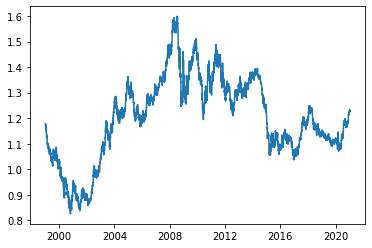

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

In [36]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar.head(30) # the first 29 rows are NaN because we do not have enough data. 

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
5,1999-01-11,1.1569,NaN
6,1999-01-12,1.1520,NaN
7,1999-01-13,1.1744,NaN
8,1999-01-14,1.1653,NaN
9,1999-01-15,1.1626,NaN


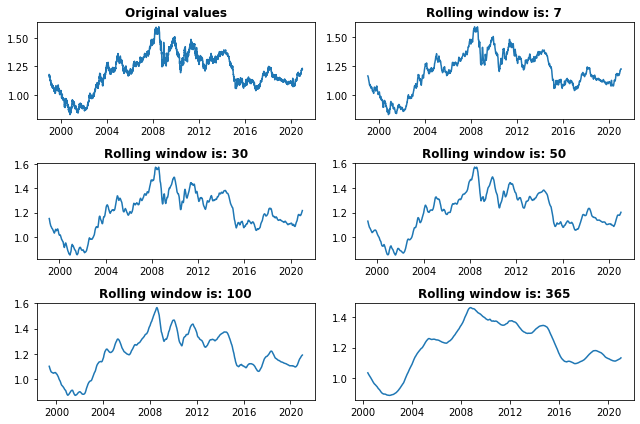

In [42]:
plt.figure(figsize =(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title("Original values", weight = 'bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6], [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title("Rolling window is: " + str(rolling_mean), weight = 'bold')

plt.tight_layout() #adjist subplot distances
plt.show()

## Slide 4: Coming up with an Idea

On this screen, we're going to spend some time coming up with an idea for the graph we want to build. Our goal is to create a storytelling data visualization using the data we have.

To create a story, remember that we need to arrange our data into a series of events that show change.

Here are a few story ideas for our data:

- We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
- We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.
- We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.



These are just a few ideas — you should think of a story angle that you find interesting.

Don't become frustrated if you don't have an idea — creativity is unpredictable. Sometimes you can have ten ideas in a minute, and sometimes you won't have any ideas in a week.

If you don't have any ideas, you can choose one from the examples above. What is important here is to spend at least a few minutes brainstorming graph ideas.

## Slide 5: Sketching a graph

Now that we know what story we want to tell, we're going to think more about how the graph is going to look.

First, we need to choose the right graph type. The graph should give our story the visual form it needs — we don't want to choose a histogram to visually represent a time series.

Equally important, we need to choose something that our audience will be familiar with. To simplify your work, you can choose any audience you want for your graph.

Next, we're going to sketch the graph — we do this before writing the code. In sketching the graph, it's important to use some of the principles we've learned so far:

- Maximize the data-ink ratio.
- Create visual patterns using Gestalt principles.
- Guide the audience's attention using pre-attentive attributes.
These design principles can help you in two ways:

- They generate design options.
- They help you choose among those options.
We advise using pen and paper to sketch the graph because it gives you more flexibility. Alternatively, you can make the sketch using a graphics editor.

This is another step that relies on creativity, so we're going to say it again: creativity is unpredictable, so don't become frustrated. If you don't come up with an idea, we have a few suggestions on the next screen.

## Storytelling Data Visualisations
### Financial Crisis

In [59]:
crisis = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2006)
 & (euro_to_dollar['Time'].dt.year <=2009)]

crisis_7_8 =  euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2007)
 & (euro_to_dollar['Time'].dt.year <=2008)]


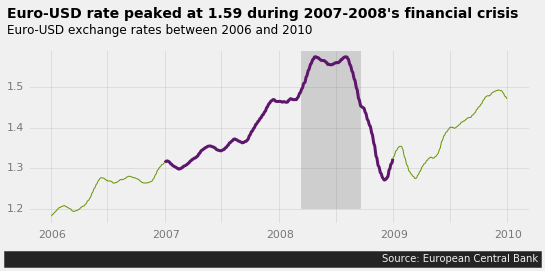

In [72]:
### Using FiveThirtyEight
import matplotlib.style as style

style.use('fivethirtyeight')

## Add plot
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(crisis['Time'],
        crisis['rolling_mean'],
        linewidth=1, color='#689506')

### Highlighting the 2007-2008 period
ax.plot(crisis_7_8['Time'],
crisis_7_8['rolling_mean'],
linewidth=3, color='#5d166c')

### Highlihting the peak of the crisis
ax.axvspan(xmin=733112.0, xmax=733302.0, ymin=0.09,
           alpha=0.3, color='grey')

           ### Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 732272.0
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(732172.0, y, rate, alpha=0.5, fontsize=11)
    y += 0.1

## Adding a title and a subtitle    
ax.text(732172.0, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold')
ax.text(732172.0, 1.63, 'Euro-USD exchange rates between 2006 and 2010',
        size=12)

### Adding a signature
ax.text(732172.0, 1.07, ' '*120 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#242424',
        size=10)

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()



### Visualisation based on the three US Administrations

Below, you'll notice we used matplotlib's functional approach to build the graphs. We use this approach because it offers more flexibility in arranging the subplots:

- We first build three of the graphs on a 2-by-3 grid (this grid should have six subplots, but we only build three; the bottom row remains empty).
- We then build only the bottom graph of a 2-by-1 grid (this grid should have two subplots; the top row remains empty).
- The two grids are merged, and we end up with three graphs on the top row and one graph on the bottom row.

In [75]:
bush_obama_trump = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]
bush = bush_obama_trump.copy(
       )[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)]
trump = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]

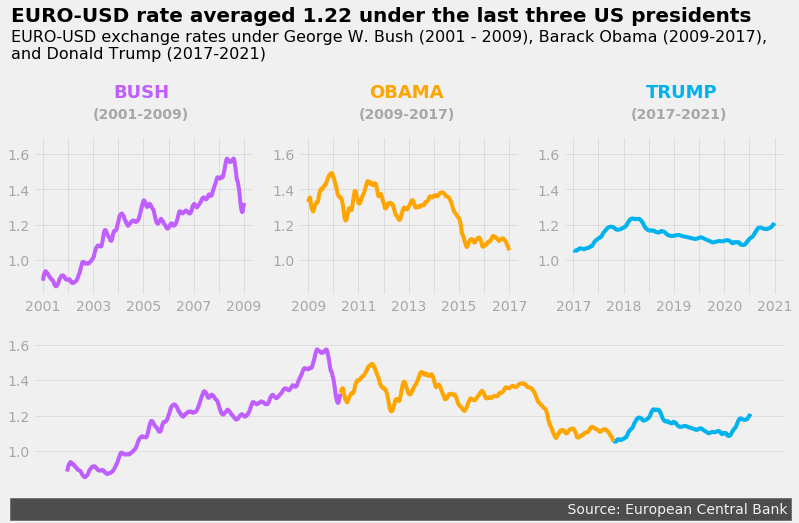

In [86]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)   

### Ax1: Bush
ax1.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax1.text(731516.0, 1.92, 'BUSH', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(731216.0, 1.8, '(2001-2009)', weight='bold',
        alpha=0.3)   


### Ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3)
ax2.text(734288.0, 1.92, 'OBAMA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(734138.0, 1.8, '(2009-2017)', weight='bold',
         alpha=0.3)   


### Ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax3.text(736855.0, 1.92, 'TRUMP', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(736745.0, 1.8, '(2017-2021)', weight='bold',
         alpha=0.3)


### Ax4: Bush-Obama-Trump
ax4.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax4.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax4.grid(alpha=0.5)
ax4.set_xticks([])



### Adding a title and a subtitle
ax1.text(730016.0, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(730016.0, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=16)

### Adding a signature
ax4.text(729916.0, 0.65,' '*123 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()